<a href="https://colab.research.google.com/github/bhavna2608/Digit-Recognition-with-CNN/blob/main/Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder

In [13]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

In [14]:
y_train = train_df["label"]
x_train = train_df.drop("label", axis=1)

In [15]:
x_train = x_train.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = test_df.values.reshape(-1, 28, 28, 1).astype("float32") / 255.0
y_train = np.array(y_train)

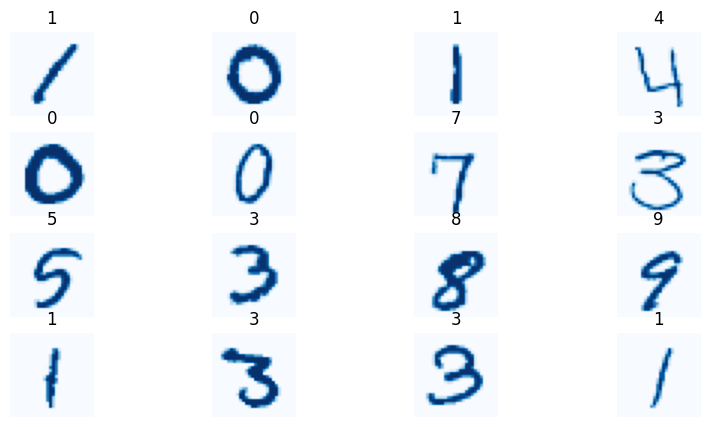

In [16]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
i = 0
for image in x_train[:16]:
    label = y_train[i]
    ax[i // 4, i % 4].imshow(image[:, :, 0], cmap="Blues")
    ax[i // 4, i % 4].set_title(label)
    ax[i // 4, i % 4].axis("off")
    i += 1
plt.show()

In [17]:
enc = OneHotEncoder()
y_train=enc.fit_transform(y_train.reshape(y_train.shape[0],1)).toarray().astype(int)

y_train[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
def Build_Model() -> Sequential:
    model = Sequential()

    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(AveragePooling2D((2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.25))

    model.add(Dense(10, activation='softmax'))

    return model

In [19]:
model = Build_Model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d_3 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 average_pooling2d_4 (Averag  (None, 7, 7, 64)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 128)       

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

checkpoint = ModelCheckpoint("digit_weights.h5", monitor='loss', verbose=1, save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='loss', factor=0.8, patience=2, verbose=1, mode='auto', min_delta=0.0001, cooldown=5)

early_stop = EarlyStopping(monitor='loss', mode='min', patience=20, restore_best_weights=True)

In [21]:
history = model.fit(
    x_train, y_train,
    epochs=1000,
    batch_size=32,
    callbacks=[checkpoint, early_stop, reduceLROnPlat]
)

Epoch 1/1000
1312/1313 [============================>.] - ETA: 0s - loss: 0.2455 - accuracy: 0.9220 - auc: 0.9951
Epoch 1: loss improved from inf to 0.24551, saving model to digit_weights.h5
1313/1313 [==============================] - 89s 67ms/step - loss: 0.2455 - accuracy: 0.9220 - auc: 0.9951 - lr: 0.0010
Epoch 2/1000
1313/1313 [==============================] - ETA: 0s - loss: 0.0761 - accuracy: 0.9774 - auc: 0.9986
Epoch 2: loss improved from 0.24551 to 0.07610, saving model to digit_weights.h5
1313/1313 [==============================] - 86s 66ms/step - loss: 0.0761 - accuracy: 0.9774 - auc: 0.9986 - lr: 0.0010
Epoch 3/1000
1312/1313 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9844 - auc: 0.9991
Epoch 3: loss improved from 0.07610 to 0.05405, saving model to digit_weights.h5
1313/1313 [==============================] - 88s 67ms/step - loss: 0.0541 - accuracy: 0.9844 - auc: 0.9991 - lr: 0.0010
Epoch 4/1000
1312/1313 [============================>.] - E

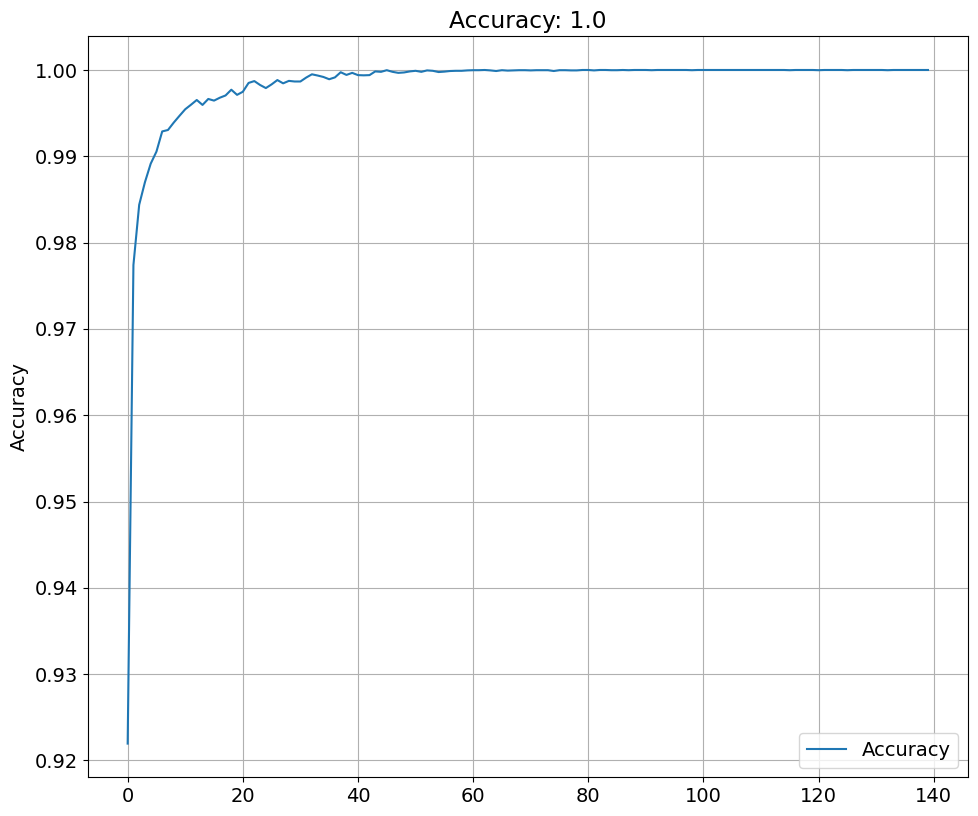

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'Accuracy: {str(acc[-1])}')
plt.tight_layout()
plt.show()

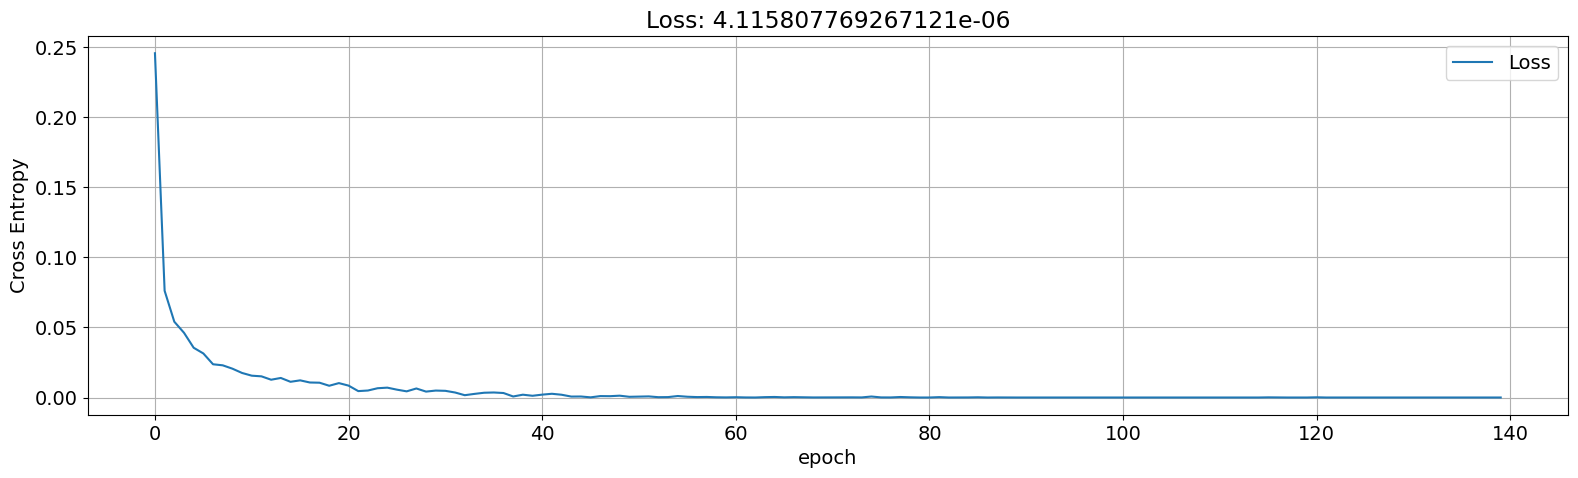

In [23]:
plt.subplot(2, 1, 2)
plt.plot(loss, label='Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Loss: {str(loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout()
plt.show()

In [24]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

875/875 [==============================] - 18s 20ms/step


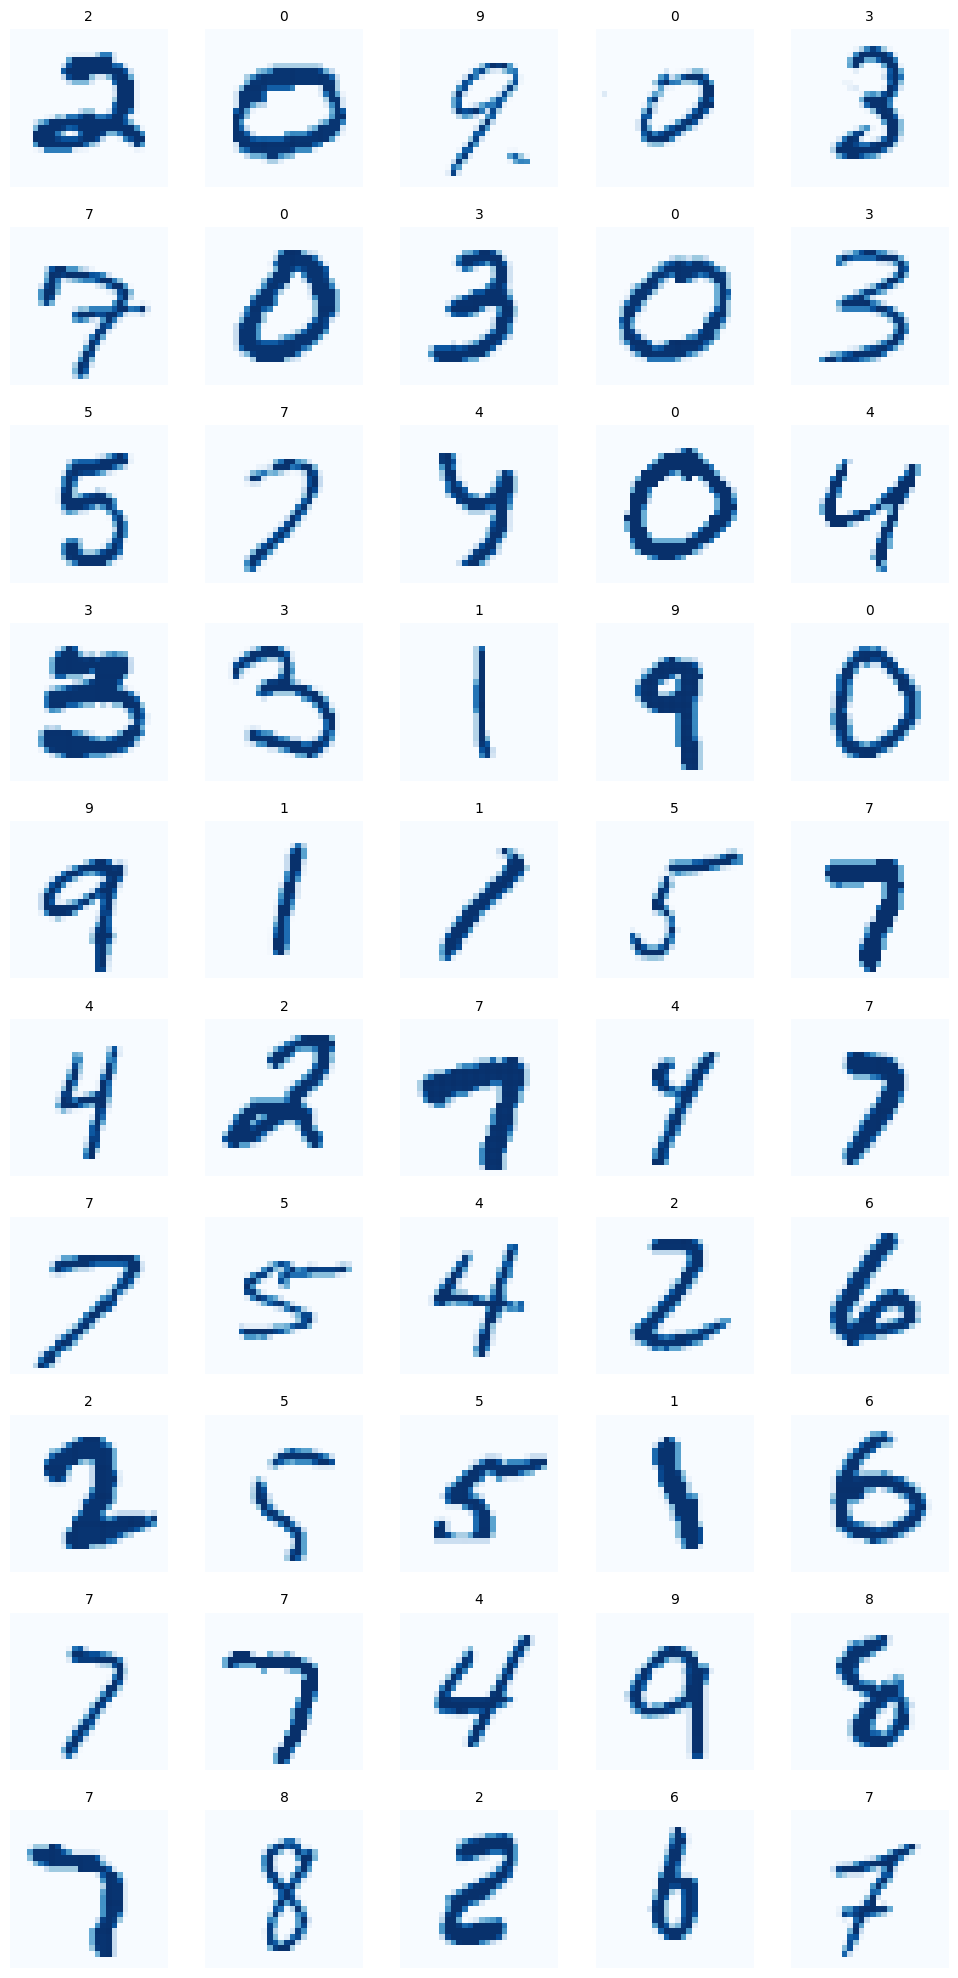

In [27]:
_, ax = plt.subplots(10, 5, figsize=(10, 20))
i = 0
for image in x_test[:50]:
    label = pred[i]
    ax[i // 5, i % 5].imshow(image[:, :, 0], cmap="Blues")
    ax[i // 5, i % 5].set_title(label, fontsize=10)  # Adjust the fontsize for the prediction label
    ax[i // 5, i % 5].tick_params(axis="both", which="both", length=0)  # Remove tick marks
    ax[i // 5, i % 5].axis("off")
    i += 1
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()
